In [5]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from pys.pdb_utils import *

In [4]:
import cv2
import matplotlib
import matplotlib.pyplot as plt

In [6]:
import pickle

In [19]:
with open('../Labels/PDBs-class-groups.pkl', 'r') as f:
    class_groups = pickle.load(f)
with open('../Labels/PDBs-fold-groups.pkl', 'r') as f:
    fold_groups = pickle.load(f)
with open('../Labels/PDBs-superfamily-groups.pkl', 'r') as f:
    superfamily_groups = pickle.load(f)
with open('../Labels/PDBs-family-groups.pkl', 'r') as f:
    family_groups = pickle.load(f)

In [24]:
k = [("a",[1,2,3],3),
     ("b",[1],1)]
sorted(k, key = lambda x:x[2],reverse=True)

[('a', [1, 2, 3], 3), ('b', [1], 1)]

In [33]:
def ProteinsOfCommonGroups(groups,n=4):
    counted_ =  map(lambda x: (x[0], x[1], len(x[1]) ),groups.items())
    sorted_ = sorted(counted_, key = lambda x:x[2],reverse=True)
    selected_ = sorted_[:n]
    all_pdbs = []
    total_count=0
    for group,pdbs,count in selected_:
        all_pdbs+=pdbs
        total_count+=count
        print(group,count)
    print("total number of pdbs: {s}".format(s=total_count))
    return pdbs

In [34]:
class_4 = ProteinsOfCommonGroups(class_groups,4)
fold_4 = ProteinsOfCommonGroups(fold_groups,4)
superfamily_4 = ProteinsOfCommonGroups(superfamily_groups,4)
family_4 = ProteinsOfCommonGroups(family_groups,4)

('c', 4717)
('d', 3861)
('b', 3551)
('a', 2676)
total number of pdbs: 14805
('b.1', 1022)
('c.1', 578)
('d.58', 501)
('c.37', 407)
total number of pdbs: 2508
('b.1.1', 618)
('c.37.1', 407)
('c.47.1', 279)
('a.4.5', 253)
total number of pdbs: 1557
('b.1.1.1', 328)
('b.1.1.0', 155)
('c.47.1.0', 145)
('c.37.1.0', 119)
total number of pdbs: 747


In [7]:
labels, features = proteinmatrixdict.keys(), proteinmatrixdict.values()
input_size = len(features[0])
print input_size

8128


b.1.1.2 ob 15
b.1.1.1 or 69
b.1.2.1 og 12
c.2.1.3 ok 11
b.1.1.4 om 13


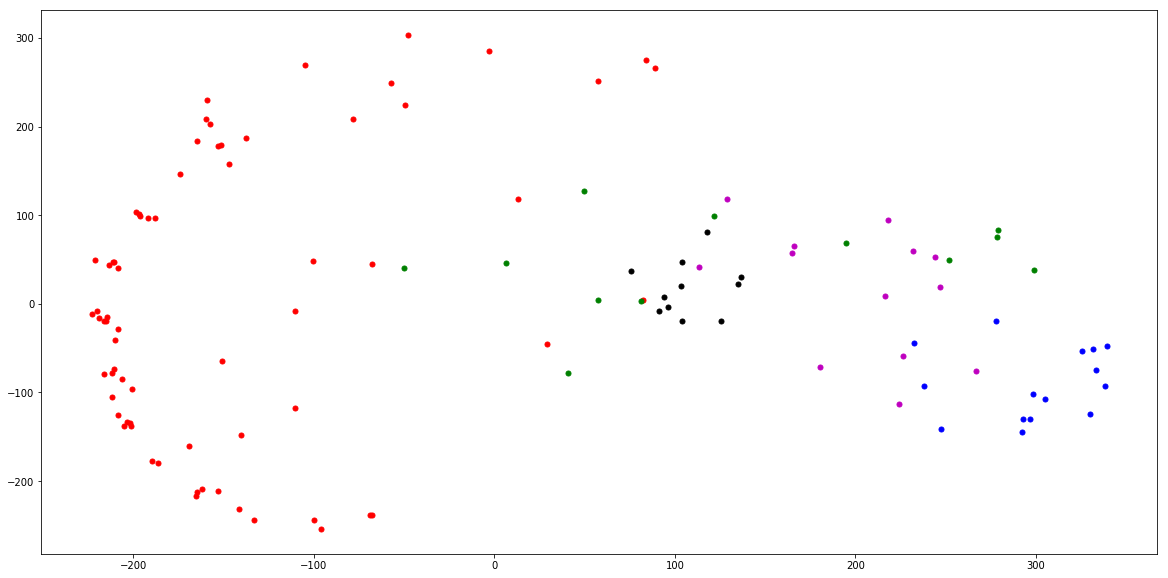

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
colors = ['ob', 'or', 'og', 'ok', "om"]
color_ix = 0

for group, proteins in selected_groups.items():
    color = colors[color_ix]
    c=0
    print group, color,
    for protein in proteins:
        try:
            f2d = result_dict[protein]
            ax.plot(f2d[0], f2d[1], color, markersize=5)
            c+=1
        except:
            continue
    print c
    color_ix+=1

plt.show()